In [8]:
import pandas as pd
import numpy as np
import tkinter as tk
from tkinter import ttk

# CARGO EL ARCHIVO Y MODIFICO EL NOMBRE DE LA COLUMNA QUE CONTIENE LOS NODOS:
vientos = pd.read_csv("C:/Users/Christian/Desktop/CLASES_2DOSEM/clase_6/Datos-Vientos.csv", sep=";")
vientos.rename(columns={"Kts": "Nodos"}, inplace=True)

# DETERMINO EN LISTAS LAS DIRECCIONES Y LOS INTERVALOS:
direcciones = [0, 10, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340, 360]
rangos = [(0, 3), (3, 6), (6, 10), (10, 16), (16, 21), (21, 27), (27, 33), (33, 40), (40, 50)]
datos_puros = pd.DataFrame(index=direcciones)

# ITERO CADA ELEMENTO DE DIRECCIONES Y RANGOS PARA IR CREANDO MI DATAFRAME:
for direccion in direcciones:
    for rango in rangos:
        filtro = (vientos['DIRECCION'] == direccion) & (vientos['Nodos'] > rango[0]) & (vientos['Nodos'] <= rango[1])
        cantidad_nodos = vientos.loc[filtro, 'Nodos'].count()
        datos_puros.loc[direccion, f"{rango[0]}-{rango[1]}"] = cantidad_nodos

datos_puros = datos_puros.astype(int)
datos_puros.insert(0, "Rad", datos_puros.index * (np.pi / 180))
datos_puros["Rad"] = datos_puros["Rad"].round(2)
direcciones_pista = list(range(0, 361, 10))

def viento_cruzado(direcciones_pista):
    v_c_list = []  
    for w in direcciones_pista:
        v_c = pd.DataFrame(index=direcciones)
        for direccion in datos_puros.index:
            for rango in rangos:
                angulo_en_radianes = (direccion - w) * np.pi / 180
                result = np.abs(rango[1] * np.sin(angulo_en_radianes))
                result_dec = round(result, 2)
                v_c.loc[direccion, f"{rango[0]}-{rango[1]}"] = result_dec
        v_c_list.append(v_c)  
    return v_c_list

def frecuencia_admisible():
    
    f_ad_list = []  
    v_c_list = viento_cruzado(direcciones_pista)
    maxim = float('-inf')
    maxim_w = None

    for idx, w in enumerate(direcciones_pista):  # Añadir enumerate para obtener índice y valor
        v_c = v_c_list[idx]  # Obtener el v_c correspondiente a la iteración actual
        f_ad = pd.DataFrame(index=direcciones)
        
        for direccion in v_c.index:
            for rango in rangos:
                x = v_c.loc[direccion, f"{rango[0]}-{rango[1]}"]
                if x < valor_limite:
                    valor_cantidad_nodos = datos_puros.loc[direccion, f"{rango[0]}-{rango[1]}"]
                    f_ad.loc[direccion, f"{rango[0]}-{rango[1]}"] = valor_cantidad_nodos
                else:
                    f_ad.loc[direccion, f"{rango[0]}-{rango[1]}"] = 0
        
        f_ad = f_ad.astype(int)
        f_ad_list.append(f_ad)
        
        # Actualizar maxim y maxim_w si se encuentra un nuevo máximo
        if f_ad.sum().sum() > maxim:
            maxim = f_ad.sum().sum()
            maxim_w = w
    
    return maxim, maxim_w

def coheficiente():
    maxim, maxim_w = frecuencia_admisible()
    viento_calma = 10853
    suma_total_frec = datos_puros.drop(columns=["Rad"]).sum().sum()
    cohe = ((maxim + viento_calma) / (viento_calma + suma_total_frec) * 100).round(2)
    resultado_texto = f"La pista con dirección {maxim_w} tiene este coeficiente: {cohe}%"
      
    return resultado_texto

def on_combobox_select(event):
    global valor_limite
    valor_limite = int(lista.get())

def on_button_click():
    maximo_coheficiente = coheficiente()
    mensaje.config(text=f"{maximo_coheficiente}")

# TKINTER

window = tk.Tk()
window.title("ROSA DE VIENTO")
window.geometry('300x200')

titulo_label = tk.Label(window, text="Selecciona una opción:")
titulo_label.pack(pady=5)

# Lista desplegable (Combobox) para seleccionar el valor límite
lista = ttk.Combobox(window, values=["10", "13", "20"])
lista.place(x=75, y=titulo_label.winfo_reqheight() + 20) 
lista.bind("<<ComboboxSelected>>", on_combobox_select)

# Botón para calcular el máximo coeficiente
button = tk.Button(window, text="Calcular", command=on_button_click)
button.pack(pady=60)

# Etiqueta para mostrar el resultado
mensaje = tk.Label(window, text="")
mensaje.place(x=20, y=150)

selected_text = tk.StringVar()

window.mainloop()


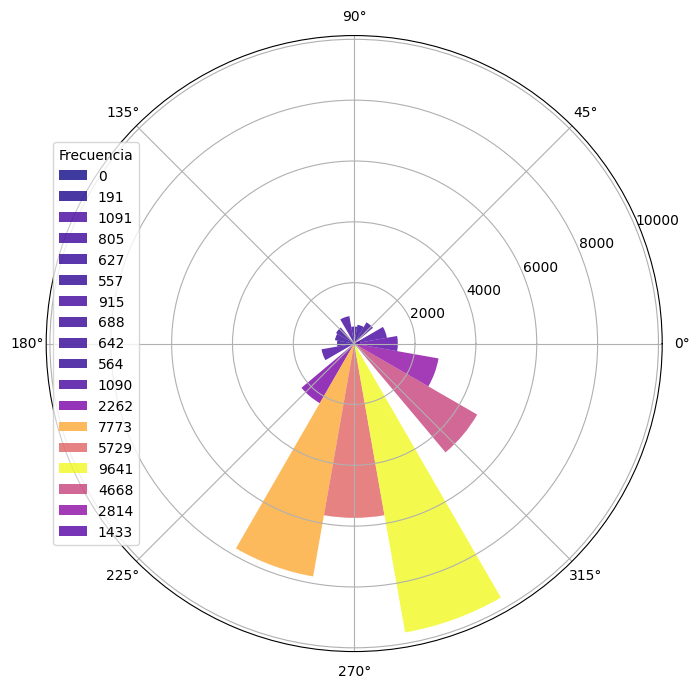

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Crea una figura y un eje polar
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='polar')

# Crea una lista con las direcciones de los vientos
directions = np.radians(direcciones)

# Crea una lista con las frecuencias de los vientos
frequencies = np.array(frecuencias)

# Encuentra la frecuencia máxima
max_frequency = np.max(frequencies)

# Crea una lista de colores para las barras radiales
colors = plt.cm.plasma(frequencies / max_frequency)

# Crea las barras radiales
bars = ax.bar(directions, frequencies, width=np.radians(20), bottom=0.0, color=colors, alpha=0.8)

# Agrega una leyenda
ax.legend(bars, frecuencias, title='Frecuencia', loc='center left')


##PARA PROBAR LOS GRAFICOS

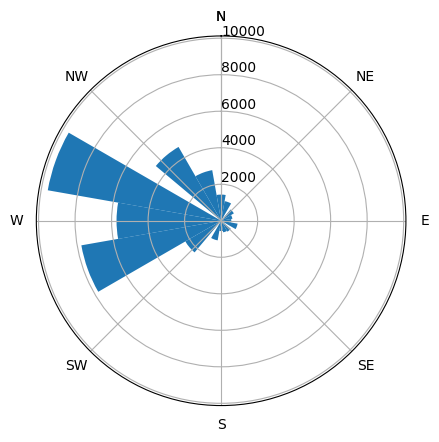

In [67]:
import matplotlib.pyplot as plt

# Crea una lista de tuplas con los valores de direcciones y frecuencias
data = list(zip(direcciones, frecuencias))

# Ordena la lista por el valor de direcciones
data_sorted = sorted(data, key=lambda x: x[0])

# Crea el gráfico con la lista ordenada
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'))
bars = ax.bar([d * (2 * np.pi / 360) for d, _ in data_sorted], [f for _, f in data_sorted], width=0.35, bottom=0.0)
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([d * (2 * np.pi / 360) for d in range(0, 361, 45)])
ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N'])
ax.set_rlabel_position(0)
#ax.legend(bars, frecuencias, title='Frecuencia', loc='center left')
plt.show()
direcciones = [0, 10, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340, 360]
frecuencias = [0, 191, 1091, 805, 627, 557, 915, 688, 642, 564, 1090, 2262, 7773, 5729, 9641, 4668, 2814, 1433]

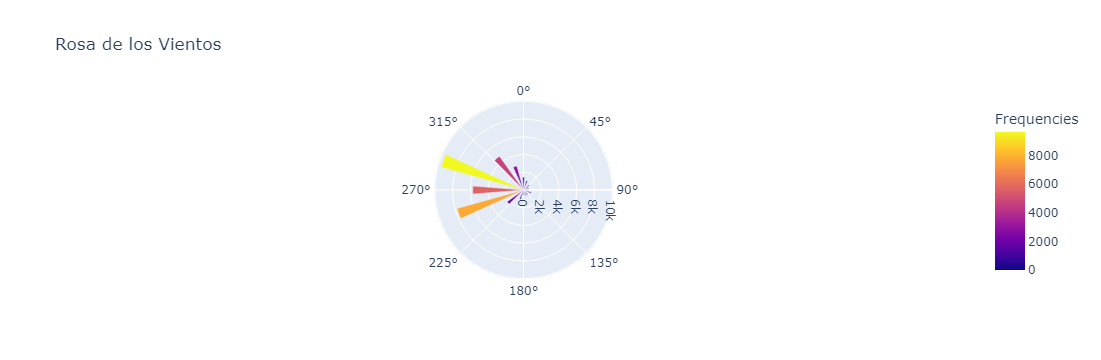

[0, 191, 1091, 805, 627, 557, 915, 688, 642, 564, 1090, 2262, 7773, 5729, 9641, 4668, 2814, 1433]


In [5]:
import pandas as pd
import plotly.express as px

def rosa():
    direcciones = [0, 10, 20, 50, 70, 90, 110, 140, 160, 180, 200, 230, 250, 270, 290, 320, 340, 360]
    frecuencias = [0, 191, 1091, 805, 627, 557, 915, 688, 642, 564, 1090, 2262, 7773, 5729, 9641, 4668, 2814, 1433]

    # Crear un DataFrame para utilizar Plotly Express
    df = pd.DataFrame({'Direcciones': direcciones, 'Frequencies': frecuencias})

    # Crear el gráfico polar con Plotly Express
    fig = px.bar_polar(df, r='Frequencies', theta='Direcciones', color='Frequencies',
                       color_continuous_scale='plasma', title='Rosa de los Vientos')

    # Ajustar la escala de colores estableciendo los valores mínimo y máximo
    fig.update_coloraxes(cmin=min(frecuencias), cmax=max(frecuencias))

    # Mostrar el gráfico
    fig.show()

rosa()

